# Ensemble

우선 필요한 데이터를 부르고 패키지들을 import한다.

이번 과제에 사용한 데이터는 데이콘의 교육 데이터 중 하나인 영화 관객수에 관한 데이터이다.

데이터는 2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터이다. 

데이터 feature에 대한 정보는 아래와 같다.

Column_name Description  


1 title : 영화의 제목  
2 distributor : 배급사  
3 genre : 장르  
4 release_time : 개봉일  
5 time : 상영시간(분)  
6 screening_rat : 상영등급  
7 director : 감독이름  
8 dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균   
관객수(단 관객수가 알려지지 않은 영화 제외)  
9 dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객  수가 알려지지 않은 영화 제외)  
10 num_staff : 스텝수  
11 num_actor : 주연배우수  
12 box_off_num : 관객수  



In [133]:
# ready
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# visualization
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

In [134]:
# Load Data
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

기본적인 데이터의 정보는 아래와 같다.

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


dir_prev_bfnum은 결측치가 너무 많았다. 그래서 결측치 행을 삭제하기보단 feature를 통째로 삭제하기로 결정했다.

In [136]:
train=train.drop('dir_prev_bfnum',1)
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0,138,3,868


release_time 같은 경우, 구체적으로 모든 날짜를 비교하기는 버거웠다. 그래서 split을 통해 첫번째인 년도만을 보기로 결정했다.

In [137]:
train['release_time'] = train['release_time'].apply(lambda x : x.split('-')[0])
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012,96,청소년 관람불가,조병옥,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015,130,청소년 관람불가,우민호,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013,123,15세 관람가,장철수,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012,101,전체 관람가,구자홍,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010,108,15세 관람가,신근호,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012,113,15세 관람가,육상효,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013,104,전체 관람가,이창재,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012,96,청소년 관람불가,임상윤,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014,129,전체 관람가,정성복,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012,94,15세 관람가,변성현,0,138,3,868


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          600 non-null    object
 1   distributor    600 non-null    object
 2   genre          600 non-null    object
 3   release_time   600 non-null    object
 4   time           600 non-null    int64 
 5   screening_rat  600 non-null    object
 6   director       600 non-null    object
 7   dir_prev_num   600 non-null    int64 
 8   num_staff      600 non-null    int64 
 9   num_actor      600 non-null    int64 
 10  box_off_num    600 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 51.7+ KB


In [138]:
#데이터의 결측치 확인
train.isnull().sum()

title            0
distributor      0
genre            0
release_time     0
time             0
screening_rat    0
director         0
dir_prev_num     0
num_staff        0
num_actor        0
box_off_num      0
dtype: int64

In [139]:
# 데이터 이상치 확인을 위한 것
train.describe()

,time,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,5.000000,869.000000,25.000000,1.426277e+07


In [140]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


지금까지 기본적으로 데이터에 대해서 훑어봤다. 지금부터는 전처리 및 EDA를 진행하려고 한다.

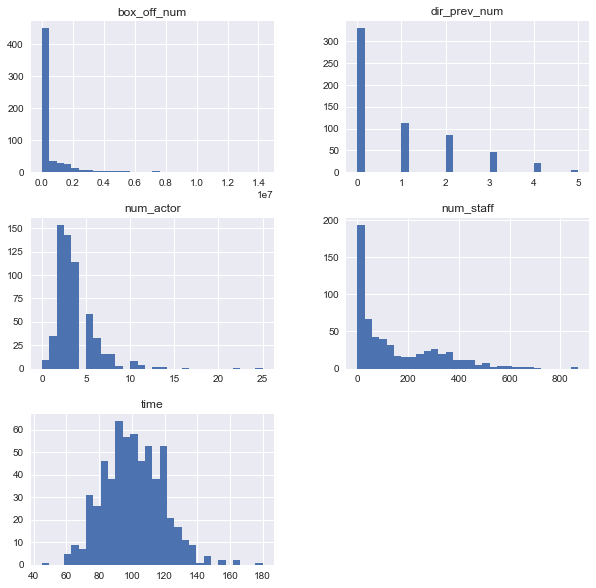

In [141]:
# 연속형 변수 분포 확인
continuous = train[['time','dir_prev_num','num_staff','num_actor','box_off_num']]
continuous.hist(bins=30,figsize=(10,10))
plt.show()

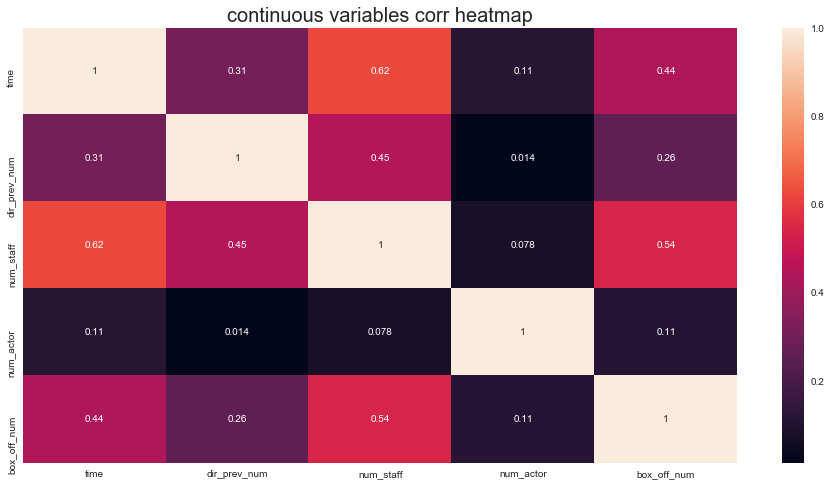

In [142]:
# 연속형 변수 heatmap 상관관계 시각화
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(), annot=True)
plt.title('continuous variables corr heatmap', fontsize=20)

plt.show()

전반적으로 데이터가 왼쪽에 치우쳐저 있다는 것을 확인할 수 있었다. 또한 heatmap을 통해 변수간의 상관성을 파악했는데 크게 눈에 띄는 곳은 스태프 수와 시간, 관객 수와 스태프 수가 있었다.

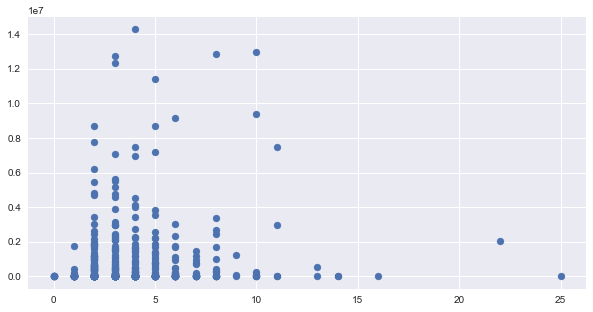

In [143]:
#
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['num_actor'], y = continuous['box_off_num'])

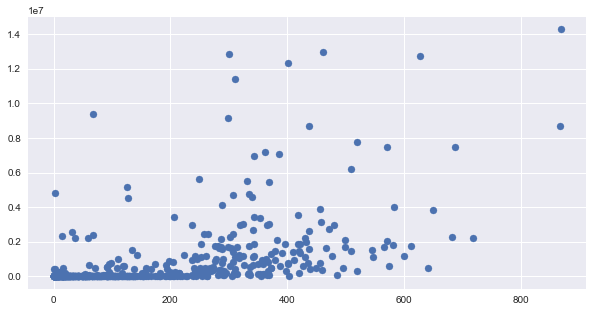

In [144]:
#
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['num_staff'], y = continuous['box_off_num'])

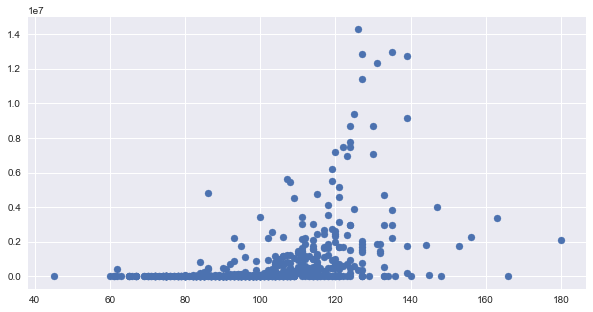

In [145]:
#
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['time'], y = continuous['box_off_num'])

구체적으로 보기위해 산점도를 그렸으나 크게 이상치로 판단되는 곳은 없어보였다.

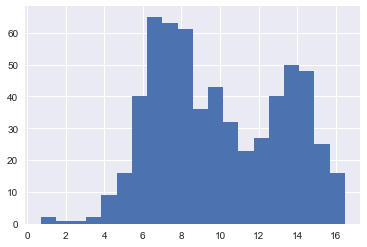

In [146]:
log_box_off_num=np.log1p(continuous['box_off_num'])
log_box_off_num.hist(bins = 20)

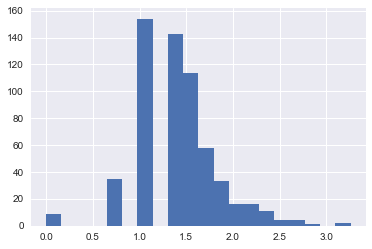

In [148]:
log_num_actor=np.log1p(continuous['num_actor'])
log_num_actor.hist(bins = 20)

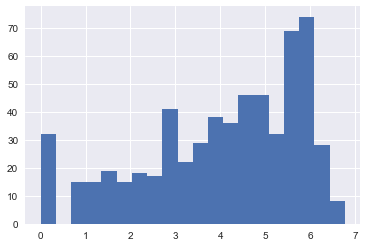

In [149]:
log_num_staff=np.log1p(continuous['num_staff'])
log_num_staff.hist(bins = 20)

또한 log scaling을 통해 정규화를 꾀하려 했으나 큰 의미가 들어있는 것 같아보이진 않으므로 넘어가기로 결정했다.

In [150]:
screening_rat_count = train['screening_rat'].value_counts()
screening_rat_count

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [151]:
genre_count = train['genre'].value_counts()
genre_count

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [152]:
release_time_count = train['release_time'].value_counts()
release_time_count

2014    127
2015    120
2013     95
2010     90
2012     88
2011     80
Name: release_time, dtype: int64

In [153]:
distributor_count = train['distributor'].value_counts()
distributor_count

CJ 엔터테인먼트          54
롯데엔터테인먼트           52
(주)NEW             30
(주)마운틴픽쳐스          29
(주)쇼박스             26
인디스토리              26
골든타이드픽처스           15
(주) 케이알씨지          14
시네마달               10
영화사 진진             10
(주) 영화사조제          10
(주)키노아이            10
어뮤즈                10
시너지                10
인디플러그               9
인벤트 디               8
NEW                 8
KT&G 상상마당           8
스폰지                 7
시네마서비스              6
무비꼴라쥬               6
BoXoo 엔터테인먼트        6
필라멘트 픽쳐스            6
(주)팝엔터테인먼트          6
시네마 달               6
리틀빅픽처스              5
CGV아트하우스            5
(주)엣나인필름            4
홀리가든                4
마노엔터테인먼트            4
나이너스엔터테인먼트(주)       4
씨너스엔터테인먼트(주)        4
메가박스(주)플러스엠         4
이모션 픽처스             3
(주) 영화제작전원사         3
트리필름                3
이십세기폭스코리아(주)        3
KT                  3
싸이더스                3
타임스토리그룹             3
김기덕 필름              3
(주) 브릿지웍스           3
CJ E&M 영화부문         3
마운틴 픽처스             3
(주)마인스 엔터테인먼트       3
씨네그루(주)키다리

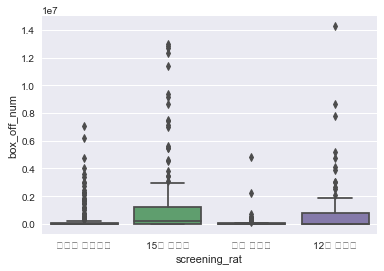

In [154]:
sns.boxplot(x=train["screening_rat"], y=train["box_off_num"], data=train)
plt.show()

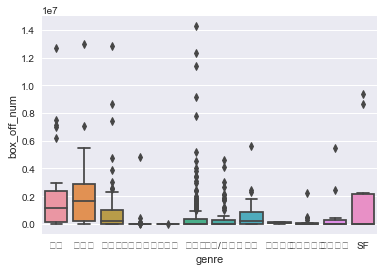

In [155]:
sns.boxplot(x=train["genre"], y=train["box_off_num"], data=train)
plt.show()

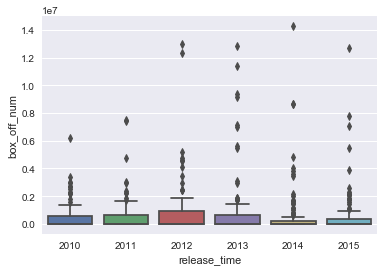

In [156]:
sns.boxplot(x=train["release_time"], y=train["box_off_num"], data=train)
plt.show()

더미변수화할 범주형 데이터를 찾기 위해 상자그림과 그 수를 세봤다. 최종적으로 realease_time과 screening_rat이 더미변수를 만들기에 적절하다고 판단했다

In [157]:
dummies_1 = pd.get_dummies(train.release_time)
dummies_2 = pd.get_dummies(train.screening_rat)

dummies_1, dummies_2

(     2010  2011  2012  2013  2014  2015
 0       0     0     1     0     0     0
 1       0     0     0     0     0     1
 2       0     0     0     1     0     0
 3       0     0     1     0     0     0
 4       1     0     0     0     0     0
 5       0     0     1     0     0     0
 6       0     0     0     1     0     0
 7       0     0     1     0     0     0
 8       0     0     0     0     1     0
 9       0     0     1     0     0     0
 10      0     0     0     0     0     1
 11      0     0     0     0     0     1
 12      0     0     1     0     0     0
 13      0     0     0     1     0     0
 14      0     0     1     0     0     0
 15      0     0     0     0     1     0
 16      0     1     0     0     0     0
 17      0     0     1     0     0     0
 18      0     0     0     0     1     0
 19      1     0     0     0     0     0
 20      0     0     0     0     1     0
 21      0     0     0     0     0     1
 22      0     0     0     0     0     1
 23      0     0

In [159]:
train2 = pd.concat([continuous,dummies_1,dummies_2],axis=1)
train2

,time,dir_prev_num,num_staff,num_actor,box_off_num,2010,2011,2012,2013,2014,2015,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,96,0,91,2,23398,0,0,1,0,0,0,0,0,0,1
1,130,2,387,3,7072501,0,0,0,0,0,1,0,0,0,1
2,123,4,343,4,6959083,0,0,0,1,0,0,0,1,0,0
3,101,2,20,6,217866,0,0,1,0,0,0,0,0,1,0
4,108,1,251,2,483387,1,0,0,0,0,0,0,1,0,0
5,113,2,262,4,233211,0,0,1,0,0,0,0,1,0,0
6,104,0,32,5,53526,0,0,0,1,0,0,0,0,1,0
7,96,3,342,2,1110523,0,0,1,0,0,0,0,0,0,1
8,129,0,3,5,4778,0,0,0,0,1,0,0,0,1,0
9,94,0,138,3,868,0,0,1,0,0,0,0,1,0,0


In [160]:
# sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

전처리를 거친 변수를 바탕으로 모델링을 진행하려고 한다. 위에서 진행했던 전처리를 train 데이터와 test데이터에 확실하게 적용해 데이터 프레임을 만들어준다.

In [161]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   time          600 non-null    int64
 1   dir_prev_num  600 non-null    int64
 2   num_staff     600 non-null    int64
 3   num_actor     600 non-null    int64
 4   box_off_num   600 non-null    int64
 5   2010          600 non-null    uint8
 6   2011          600 non-null    uint8
 7   2012          600 non-null    uint8
 8   2013          600 non-null    uint8
 9   2014          600 non-null    uint8
 10  2015          600 non-null    uint8
 11  12세 관람가       600 non-null    uint8
 12  15세 관람가       600 non-null    uint8
 13  전체 관람가        600 non-null    uint8
 14  청소년 관람불가      600 non-null    uint8
dtypes: int64(5), uint8(10)
memory usage: 29.4 KB


In [162]:
# target 분리, data split
y = train2['box_off_num']
X = train2.loc[:,train2.columns != 'box_off_num']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=318)

In [163]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [164]:
test2 = test

test2['release_time'] = test2['release_time'].apply(lambda x : x.split('-')[0])


dummies_3 = pd.get_dummies(test.release_time)
dummies_4 = pd.get_dummies(test.screening_rat)

test2 = pd.concat([test2,dummies_3,dummies_4], axis = 1)

test2.drop(['dir_prev_bfnum','title','distributor','genre','release_time','director','screening_rat'],axis = 1,inplace = True)



test_ID = test['title']
test2 

,time,dir_prev_num,num_staff,num_actor,2010,2011,2012,2013,2014,2015,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,125,2,304,3,1,0,0,0,0,0,0,0,0,1
1,113,4,275,3,1,0,0,0,0,0,1,0,0,0
2,115,3,419,7,1,0,0,0,0,0,1,0,0,0
3,116,2,408,2,1,0,0,0,0,0,0,1,0,0
4,110,1,380,1,1,0,0,0,0,0,0,1,0,0
5,95,0,156,2,1,0,0,0,0,0,0,1,0,0
6,104,0,11,2,1,0,0,0,0,0,0,1,0,0
7,100,0,117,5,1,0,0,0,0,0,0,0,0,1
8,88,0,76,1,1,0,0,0,0,0,0,1,0,0
9,107,0,255,3,1,0,0,0,0,0,0,1,0,0


In [165]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   time          243 non-null    int64
 1   dir_prev_num  243 non-null    int64
 2   num_staff     243 non-null    int64
 3   num_actor     243 non-null    int64
 4   2010          243 non-null    uint8
 5   2011          243 non-null    uint8
 6   2012          243 non-null    uint8
 7   2013          243 non-null    uint8
 8   2014          243 non-null    uint8
 9   2015          243 non-null    uint8
 10  12세 관람가       243 non-null    uint8
 11  15세 관람가       243 non-null    uint8
 12  전체 관람가        243 non-null    uint8
 13  청소년 관람불가      243 non-null    uint8
dtypes: int64(4), uint8(10)
memory usage: 10.1 KB


최종적으로 분석에 사용할 데이터 셋은 위와 같이 만들어졌다.

본격적인 모델링에 들어가자. 이번에도 사용할 score는 rmse로 진행하기로 한다.

In [185]:
n_folds = 5
train = X
def rmse_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
  return (rmse)

In [186]:
def rmse(y,y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

In [187]:
lr = make_pipeline(RobustScaler(), LinearRegression())
dt = make_pipeline(RobustScaler(), DecisionTreeRegressor(max_depth=10))
knn = make_pipeline(RobustScaler(),KNeighborsRegressor(n_neighbors = 3))
svm = make_pipeline(RobustScaler(),SVR())
rf = make_pipeline(RandomForestRegressor())
gbm = make_pipeline(GradientBoostingRegressor(n_estimators = 3000, learning_rate=0.05,
                                              max_depth=4, max_features='sqrt',
                                              min_samples_leaf=15, min_samples_split=10,
                                              loss = 'huber', random_state=1004))
xgb_ = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lgb_ = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20) 

In [188]:
score = rmse_cv(lr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(dt)
print("\nDecision tree score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(knn)     
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(svm)     
print("\nSVM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(rf)     
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(gbm)     
print("\nGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(xgb_)     
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmse_cv(lgb_)     
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 1452898.6505 (214471.8940)


Decision tree score: 1770769.2092 (263359.9823)


KNN score: 1660164.1419 (132386.9470)


SVM score: 1893958.8791 (237421.5886)


Random Forest score: 1340942.0213 (221229.7199)


GBM score: 1504163.4454 (201684.3109)

[13:41:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:41:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please

1번 과제에서 진행했던 것과는 다르게 상상도 못할 정도로 큰 값들이 나왔다.

구체적인 파라미터 조율을 통해 모델링을 진행한다. 이 과정에서 앙상블 기법인 랜덤 포레스트, gbm, xgb를 실시할 예정이고, 이를 바탕으로 stacking까지 진행하기로 하자.

아래와 같이 기본적인 모델을 불러오자

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import rbf_kernel 

In [190]:
param_grid_dt = {'decisiontreeregressor__max_depth':[1,2,3,4,5,6,7],
                'decisiontreeregressor__min_samples_split':[2,3],
                }

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(max_depth=10))]),
             param_grid={'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7],
                         'decisiontreeregressor__min_samples_split': [2, 3]},
             scoring='neg_mean_squared_error')

In [191]:
print("Best Parameter: {}".format(grid_dt.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_dt.best_score_))
print("Test set Score: {:.3f}".format(grid_dt.score(X_test, y_test)))
rmse(y_test,grid_dt.predict(X_test))

Best Parameter: {'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_split': 2}
Best Cross-validity Score: -2172536364551.182
Test set Score: -3178198790733.025


1782750.3444770456

In [192]:
param_grid_knn = {'kneighborsregressor__n_neighbors':[1,3,5,7],
                'kneighborsregressor__weights':['uniform', 'distance'],
                 'kneighborsregressor__metric' : ['euclidean', 'manhattan']}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor(n_neighbors=3))]),
             param_grid={'kneighborsregressor__metric': ['euclidean',
                                                         'manhattan'],
                         'kneighborsregressor__n_neighbors': [1, 3, 5, 7],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             scoring='neg_mean_squared_error')

In [193]:
print("Best Parameter: {}".format(grid_knn.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_knn.best_score_))
print("Test set Score: {:.3f}".format(grid_knn.score(X_test, y_test)))

rmse(y_test,grid_knn.predict(X_test))

Best Parameter: {'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 7, 'kneighborsregressor__weights': 'uniform'}
Best Cross-validity Score: -2245562385582.144
Test set Score: -3040121095496.073


1743594.3035855768

In [194]:
param_grid_svm = {'svr__kernel':['linear','rbf'],
                  'svr__C':[1,5,10],
                  'svr__gamma' : ['auto', 'scale']}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='neg_mean_squared_error',n_jobs = -1)
grid_svm.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [1, 5, 10], 'svr__gamma': ['auto', 'scale'],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [195]:
print("Best Parameter: {}".format(grid_svm.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_svm.best_score_))
print("Test set Score: {:.3f}".format(grid_svm.score(X_test, y_test)))

rmse(y_test,grid_svm.predict(X_test))

Best Parameter: {'svr__C': 10, 'svr__gamma': 'auto', 'svr__kernel': 'linear'}
Best Cross-validity Score: -3638047089502.673
Test set Score: -4220170776702.564


2054305.4243959354

# Random Forest

In [196]:
param_grid_rf = {'randomforestregressor__n_estimators':[100,200,300,400,500],
                  'randomforestregressor__max_depth':[1,2,3,4,5,6,7],
                  }

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error',n_jobs = -1)
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7],
                         'randomforestregressor__n_estimators': [100, 200, 300,
                                                                 400, 500]},
             scoring='neg_mean_squared_error')

In [255]:
print("Best Parameter: {}".format(grid_rf.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_rf.best_score_))
print("Test set Score: {:.3f}".format(grid_rf.score(X_test, y_test)))

rmse(y_test,grid_rf.predict(X_test))

Best Parameter: {'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 200}
Best Cross-validity Score: -1749529109982.130
Test set Score: -2777656459872.761


1666630.270897766

In [256]:
y_pred_rf = grid_rf.predict(X_test)
rmse(y_test,y_pred_rf)

1666630.270897766

랜덤 포레스트 결과는 위와 같이 나왔다. make_pipeline으로 모델을 불러오고, 그리드 서치로 파라미터를 찾은 후, 이를 학습시켜 y_pred를 구했다. 최종적으로 rmse 값은 1666630이 나왔다. 그러나 이 값은 기존의 학습을 시키지 않았을 때의 값보다 훨씬 늘어난 값이다. 파라미터의 범주가 잘못됐었다고 조심스럽게 추측해본다.

# GBM

In [198]:
param_grid_gbm = {'gradientboostingregressor__n_estimators':[100,250,500,750,1000,2000,3000],
                  'gradientboostingregressor__learning_rate':[0.1, 0.05, 0.01, 0.005, 0.001],
                  }

grid_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='neg_mean_squared_error')
grid_gbm.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(learning_rate=0.05,
                                                                  loss='huber',
                                                                  max_depth=4,
                                                                  max_features='sqrt',
                                                                  min_samples_leaf=15,
                                                                  min_samples_split=10,
                                                                  n_estimators=3000,
                                                                  random_state=1004))]),
             param_grid={'gradientboostingregressor__learning_rate': [0.1, 0.05,
                                                                      0.01,
                                                                      0.00

In [199]:
print("Best Parameter: {}".format(grid_gbm.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_gbm.best_score_))
print("Test set Score: {:.3f}".format(grid_gbm.score(X_test, y_test)))

rmse(y_test,grid_gbm.predict(X_test))

Best Parameter: {'gradientboostingregressor__learning_rate': 0.01, 'gradientboostingregressor__n_estimators': 3000}
Best Cross-validity Score: -2208122826370.815
Test set Score: -2820776935705.163


1679516.8756833505

In [257]:
y_pred_gbm = grid_gbm.predict(X_test)
rmse(y_test,y_pred_gbm)

1679516.8756833505

gbm 역시 랜덤포레스트와 같은 방식으로 값을 구했다. 역시 rmse값이 올라간 것을 확인할 수 있다. 그러나 랜덤포레스트보다는 덜 올랐다는 것을 확인할 수 있다.

# XGB

In [200]:
param_grid_xgb = {'xgbregressor__n_estimators':[1000,2000,3000],
                  'xgbregressor__learning_rate':[0.1, 0.01, 0.001],
                  'xgbregressor__max_depth':[3,5,7]
                  }

grid_xgb = GridSearchCV(xgb_, param_grid_xgb, cv=5, scoring='neg_mean_squared_error',n_jobs = -1)
grid_xgb.fit(X_train,y_train)

[13:53:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent, xgbregressor__learning_rate, xgbregressor__max_depth, xgbregressor__n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=0.4603, gamma=0.0468,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.05, max_delta_step=None,
                                    max_depth=3, min_child_weight=1.7817,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=2200, n_j...
                                    num_parallel_tree=None, random_state=7,
                                    reg_alpha=0.464, reg_lambda=0.8571,
                                    scale_pos_weight=None, silent=1,
                                    subsample=0.5213, tree_method=None,
   

In [201]:
print("Best Parameter: {}".format(grid_xgb.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_xgb.best_score_))
print("Test set Score: {:.3f}".format(grid_xgb.score(X_test, y_test)))

rmse(y_test,grid_xgb.predict(X_test))

Best Parameter: {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 1000}
Best Cross-validity Score: -2661419867912.429
Test set Score: -3178065061509.418


1782712.8376464387

In [258]:
y_pred_xgb = grid_xgb.predict(X_test)
rmse(y_test,y_pred_xgb)

1782712.8376464387

xgb 역시 그 값이 현저하게 올랐다. 전반적으로 파라미터의 범주를 잘못 측정한 것 같다. 어쨌든 최종적으로 구한 rmse값은 아래와 같다.

In [205]:
print(rmse_cv(lr).mean())
print(rmse(y_test,grid_dt.predict(X_test)))
print(rmse(y_test,grid_knn.predict(X_test)))
print(rmse(y_test,grid_svm.predict(X_test)))
print(rmse(y_test,grid_rf.predict(X_test)))
print(rmse(y_test,grid_gbm.predict(X_test)))
print(rmse(y_test,grid_xgb.predict(X_test)))

1452898.6505118527
1782750.3444770456
1743594.3035855768
2054305.4243959354
1666630.270897766
1679516.8756833505
1782712.8376464387


# Stacking

이를 바탕으로 stacking을 진행해봤다. stacking은 sklearn에서 제공하는 방식을 사용했다.

In [206]:
from sklearn.ensemble import StackingRegressor

In [207]:
lr = make_pipeline(RobustScaler(), LinearRegression())
dt = make_pipeline(RobustScaler(), DecisionTreeRegressor(max_depth=4, min_samples_split = 2))
knn = make_pipeline(RobustScaler(),KNeighborsRegressor(n_neighbors = 7, metric = 'manhattan',weights = 'uniform'))
svm = make_pipeline(RobustScaler(),SVR(C = 10, gamma = 'auto', kernel = 'linear'))
rf = make_pipeline(RandomForestRegressor(max_depth = 5, n_estimators = 200))
gbm = make_pipeline(GradientBoostingRegressor(n_estimators = 3000, learning_rate=0.01,
                                              max_depth=4, max_features='sqrt',
                                              min_samples_leaf=15, min_samples_split=10,
                                              loss = 'huber', random_state=1004))
xgb_ = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [209]:
# 파라미터 설정
estimators = [
              ('lr',lr),
              ('rf',rf),
              ('gbm',svm)
]
              
# Stacking
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = make_pipeline(RobustScaler(),KNeighborsRegressor(n_neighbors = 7, metric = 'manhattan',weights = 'uniform')),
    cv = 5,
    n_jobs= -1,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('lr',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('linearregression',
                                                LinearRegression())])),
                              ('rf',
                               Pipeline(steps=[('randomforestregressor',
                                                RandomForestRegressor(max_depth=5,
                                                                      n_estimators=200))])),
                              ('gbm',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('svr',
                                                SVR(C=10, gamma='auto',
                                                    kernel='linear'))]))],
                  final_estimator=Pipeline(steps=[('robustscaler',
                                            

In [210]:
rmse(y_test,reg.predict(X_test))

1719578.7392533165

rmse가 가장 작은 세 모델을 적합시킨 것임에도 불구하고 값이 오른 것을 확인할 수 있었다. 우리가 배운 앙상블 이론은 정말 최적의 값을 도출하는 기법처럼 들렸다. 그러나 실제는 그렇지 않다. 정말 최적의 모델을 만들기 위해서는 많은 시도와 시행착오를 거쳐야 한다. 어줍잖게 한다면 오히려 더 나쁜 모델을 만들 수 있다는 점을 주의하자.

In [259]:
test2

,time,dir_prev_num,num_staff,num_actor,2010,2011,2012,2013,2014,2015,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,125,2,304,3,1,0,0,0,0,0,0,0,0,1
1,113,4,275,3,1,0,0,0,0,0,1,0,0,0
2,115,3,419,7,1,0,0,0,0,0,1,0,0,0
3,116,2,408,2,1,0,0,0,0,0,0,1,0,0
4,110,1,380,1,1,0,0,0,0,0,0,1,0,0
5,95,0,156,2,1,0,0,0,0,0,0,1,0,0
6,104,0,11,2,1,0,0,0,0,0,0,1,0,0
7,100,0,117,5,1,0,0,0,0,0,0,0,0,1
8,88,0,76,1,1,0,0,0,0,0,0,1,0,0
9,107,0,255,3,1,0,0,0,0,0,0,1,0,0


In [260]:
ensemble = reg.predict(test2)

In [261]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['box_off_num'] = ensemble

In [262]:
sub.head()

,Id,box_off_num
0,용서는 없다,6.718806e+05
1,아빠가 여자를 좋아해,7.609500e+05
2,하모니,8.615361e+05
3,의형제,1.077116e+06
4,평행 이론,2.196607e+06


이를 바탕으로 만든 결과는 이와 같다. 실제 해당 영화를 검색해보면 관객수가 차이가 많이난다는 것을 확인할 수 있었다ㅠ